In [111]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [112]:
from platform import python_version

In [113]:
python_version()

'3.7.9'

In [114]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from matplotlib.colors import ListedColormap

In [115]:
entry_phase_color_map_val = [1, 2, 3, 4, 5]
entry_phase_color_map = ListedColormap(['red', 'green', 'blue', 'orange', 'purple'])

In [116]:
data = pd.read_csv('sim_log_Edwards.csv')
#data = pd.read_csv('sim_log_Vandenberg.csv')
#data = pd.read_csv('sim_log_Istres.csv')

data['time'] = data['time'] - data['time'][0]

data.head()

,step,time,alt,speed,hdot,range,az_err,lat,long,pitch,roll,unl_roll,roll_ref,l_d,drag,drag_ref,hdot_ref,entry_phase,Unnamed: 18
0,1,0,121.239000,7846.999461,-164.867980,8683.790776,4.972968,-4.379186,169.895841,40.0,0.0,0.0,0.0,0.225191,0.028329,0.0,0.0,1,NaN
1,2,2,120.909319,7847.379169,-164.813021,8683.790755,4.964274,-4.290548,169.994162,40.0,0.0,0.0,0.0,0.225985,0.029241,0.0,0.0,1,NaN
2,3,4,120.579749,7847.758205,-164.756983,8669.151531,4.967083,-4.201885,170.092472,40.0,0.0,0.0,0.0,0.226924,0.030172,0.0,0.0,1,NaN
3,4,6,120.250292,7848.136549,-164.699858,8654.510608,4.969922,-4.113199,170.190767,40.0,0.0,0.0,0.0,0.227919,0.031136,0.0,0.0,1,NaN
4,5,8,119.920950,7848.514177,-164.641640,8639.868405,4.972793,-4.024490,170.289048,40.0,0.0,0.0,0.0,0.228971,0.032137,0.0,0.0,1,NaN


In [117]:
import plotly.graph_objects as go
from math import log2, radians, cos, sqrt


# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=data['long'],
    lat=data['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=data['alt'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=data['alt'].min(),
        cmax=data['alt'].max(),
        colorbar=dict(title='Altitude')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Az err: %{customdata}<extra></extra>',
    text=data['alt'],
    customdata=data['az_err']
)

center_lat = (data['lat'].min() + data['lat'].max()) / 2
center_lon = (data['long'].min() + data['long'].max()) / 2


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,
    
        center=dict(lat=center_lat, lon=center_lon),
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),
        
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)


# Display the figure
fig.show()

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Altitude (km)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Speed (m/s)')

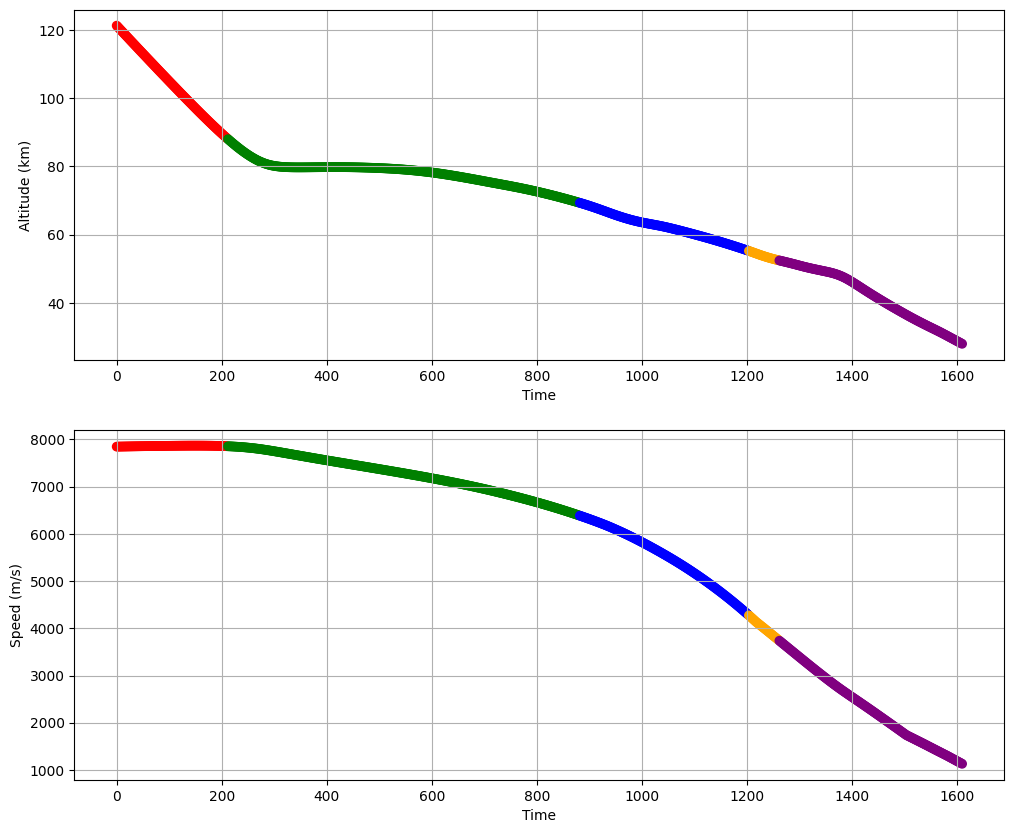

In [118]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt1 = plt_.scatter(data['time'], data['alt'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)
    

plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()
  


plt_ = ax[1]
plt2 = plt_.scatter(data['time'], data['speed'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()




Text(0.5, 0, 'Range')

Text(0, 0.5, 'Altitude (km)')

-473.5739581329341


Text(0.5, 0, 'Range')

Text(0, 0.5, 'Crossrange (km)')

Text(0.5, 0, 'Range')

Text(0, 0.5, 'Speed (m/s)')

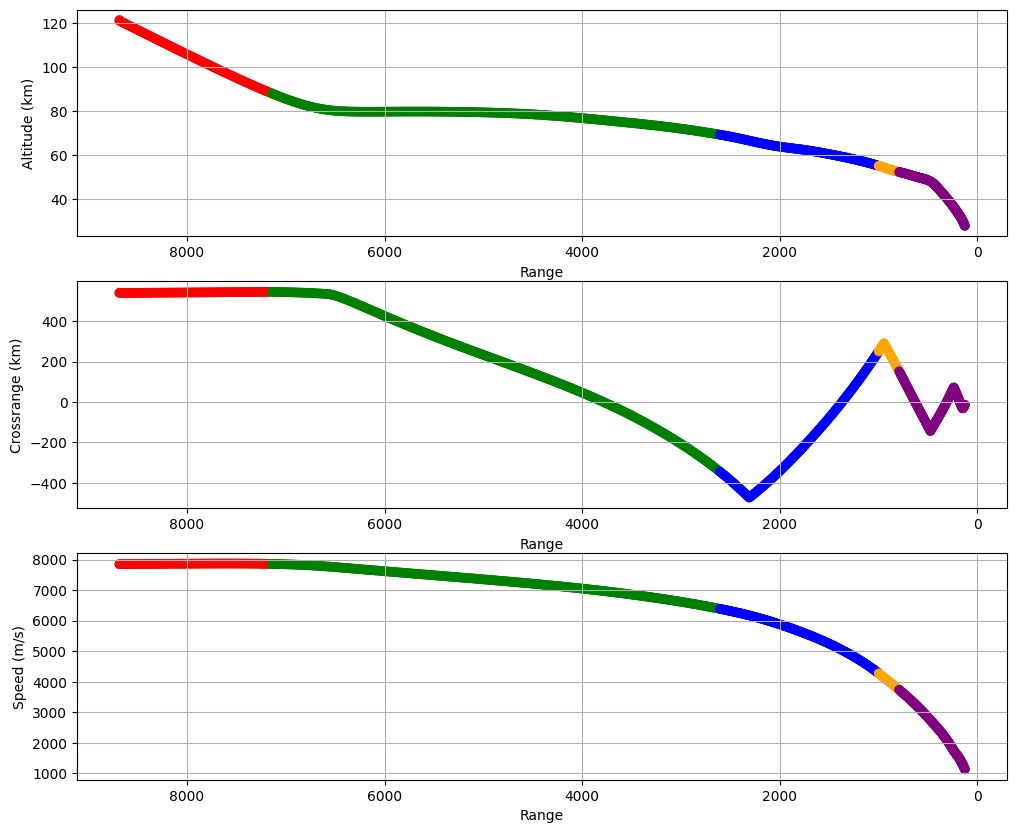

In [119]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

plt_ = ax[0]

plt1 = plt_.scatter(data['range'], data['alt'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)

    
plt_.set_xlabel('Range')
plt_.set_ylabel('Altitude (km)')
plt_.grid()

plt_.invert_xaxis()

sin_B = data['az_err'].apply(lambda az: math.sin(math.radians(az))).to_numpy()
sin_c = data['range'].apply(lambda r : math.sin(r / 6371) ).to_numpy()
xr = np.arcsin(np.multiply(sin_B, sin_c)) * 6371

print(np.min(xr))

plt_ = ax[1]
plt1 = plt_.scatter(data['range'], xr, c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)


    
plt_.set_xlabel('Range')
plt_.set_ylabel('Crossrange (km)')
plt_.grid()

plt_.invert_xaxis()

plt_ = ax[2]
plt1 = plt_.scatter(data['range'], data['speed'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)


plt_.set_xlabel('Range')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()

plt_.invert_xaxis()




Text(0.5, 0, 'Speed')

Text(0, 0.5, 'Pitch °')

Text(0.5, 0, 'speed')

Text(0, 0.5, 'Roll °')

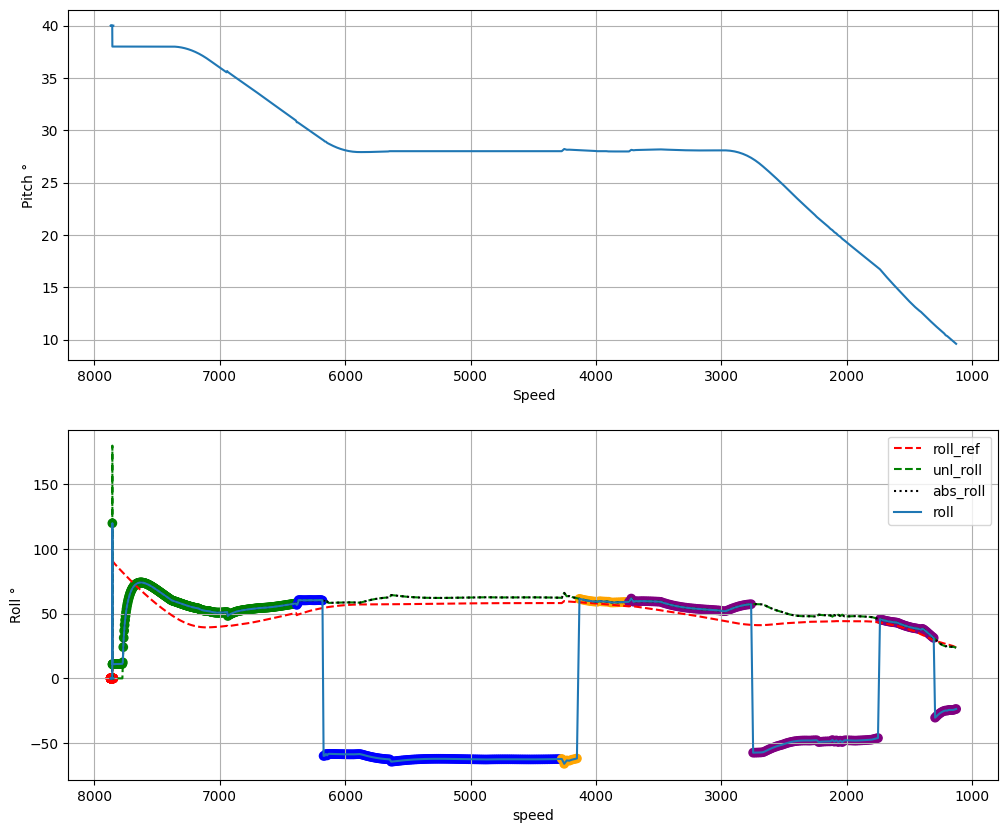

In [120]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['speed'], data['pitch'])
    
plt_.set_xlabel('Speed')
plt_.set_ylabel('Pitch °')
plt_.grid()

plt_.invert_xaxis()

plt_ = ax[1]

plt_.plot(data['speed'], abs(data['roll_ref']),'--', color='r',label='roll_ref')
plt_.plot(data['speed'], abs(data['unl_roll']),'--', color='g',label='unl_roll')
plt_.plot(data['speed'], abs(data['roll']),':', color='k',label='abs_roll')
plt1 = plt_.plot(data['speed'], data['roll'], label='roll')

plt1 = plt_.scatter(data['speed'], data['roll'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)


    
plt_.set_xlabel('speed')
plt_.set_ylabel('Roll °')
plt_.legend()
plt_.grid()

plt_.invert_xaxis()



[Text(1, 1.4, 'Preeentry'),
 Text(1, 2.2, 'T control'),
 Text(1, 3.0, 'Eq glide'),
 Text(1, 3.8, 'Const drag'),
 Text(1, 4.6, 'Transition')]

Text(0.5, 0, 'speed')

Text(0, 0.5, 'drag (ft/s)')

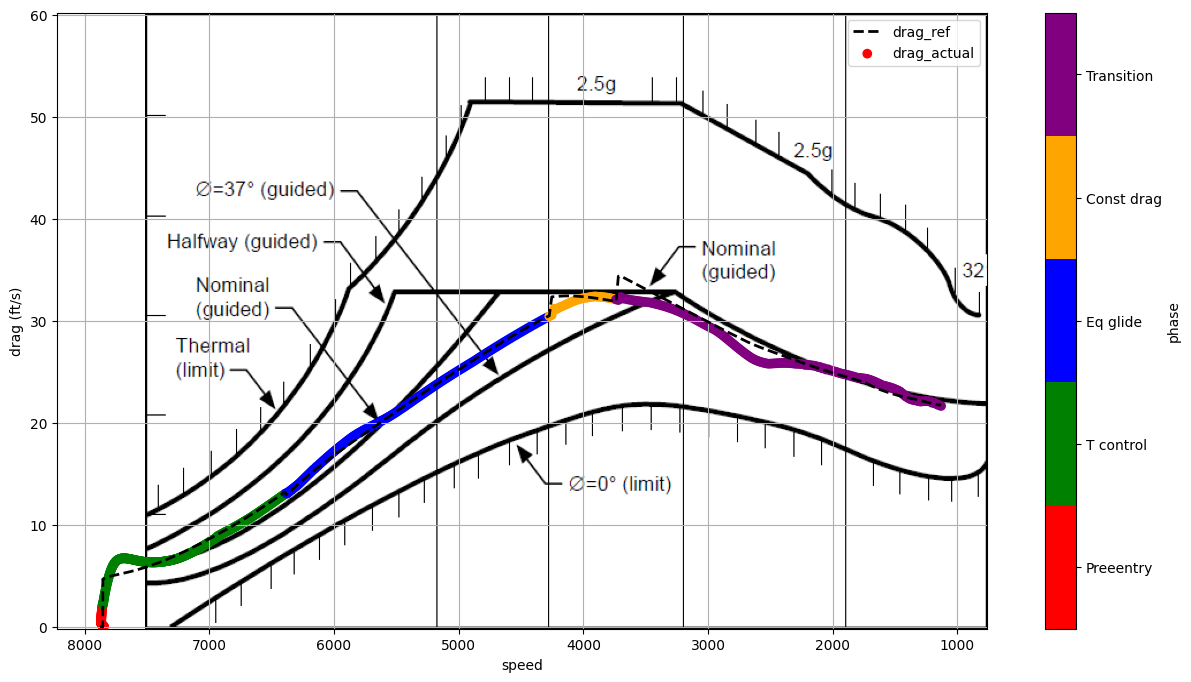

In [121]:


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

plt_ = ax

img = plt.imread("drag2.png")
plt_.imshow(img, aspect='auto', extent=[7520, 762, -0.2, 60.2], alpha=1 , cmap='Greys_r')

plt_.plot(data['speed'], data['drag_ref'],'--', linewidth=2, color='k',label='drag_ref')

plt1 = plt_.scatter(data['speed'], data['drag'], label='drag_actual', c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)

cbar = plt.colorbar(plt1,ticks=[1.4, 2.2, 3.0, 3.8, 4.6])
cbar.ax.set_yticklabels(['Preeentry', 'T control', 'Eq glide', 'Const drag', 'Transition'])
cbar.set_label('phase')  



plt_.set_xlabel('speed')
plt_.set_ylabel('drag (ft/s)')
plt_.legend()
plt_.grid()

#plt_.invert_xaxis()

(-150.0, 0.0)

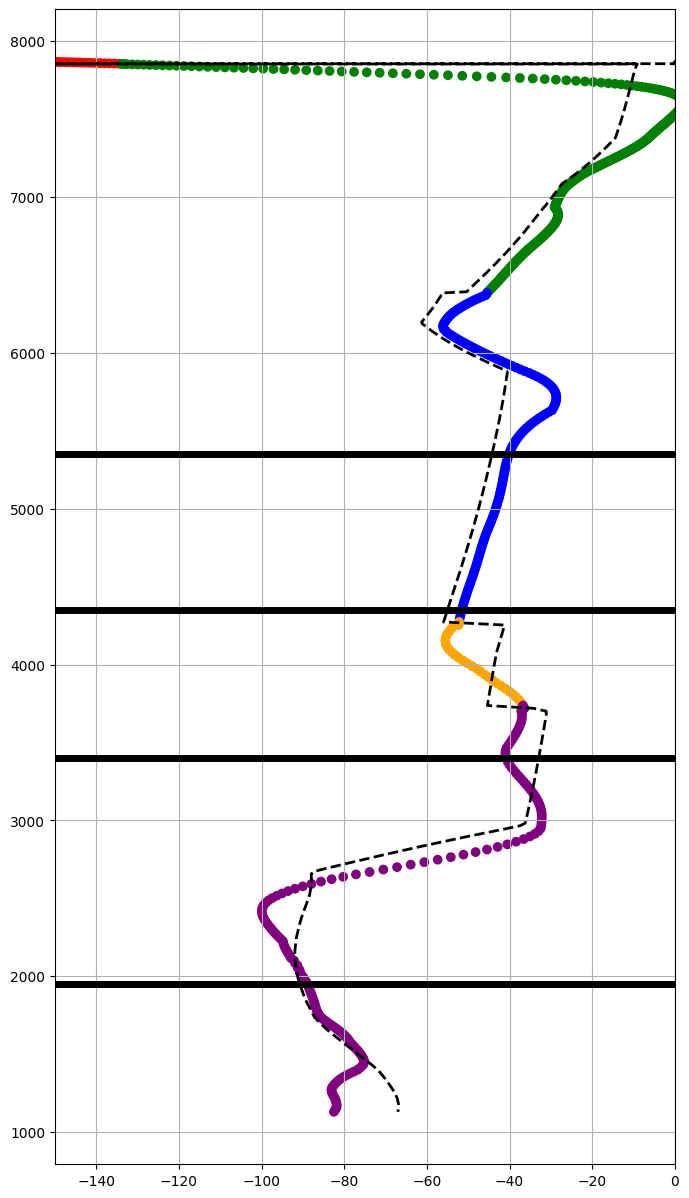

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 15))

plt_ = ax

plt_.plot(data['hdot_ref'], data['speed'], '--', linewidth=2, color='k',label='drag_ref')

plt1 = plt_.scatter(data['hdot'], data['speed'], label='drag_actual', c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)

plt_.axhline(5350, -150, 1, color='k', linewidth=5 )
plt_.axhline(4350, -150, 1, color='k', linewidth=5 )
plt_.axhline(3400, -150, 1, color='k', linewidth=5 )
plt_.axhline(1950, -150, 1, color='k', linewidth=5 )

plt.grid()
plt_.set_xlim([-150, 0])



[Text(1, 1.4, 'Preeentry'),
 Text(1, 2.2, 'T control'),
 Text(1, 3.0, 'Eq glide'),
 Text(1, 3.8, 'Const drag'),
 Text(1, 4.6, 'Transition')]

Text(0.5, 0, 'speed')

Text(0, 0.5, 'L/D')

(0.0, 2.8)

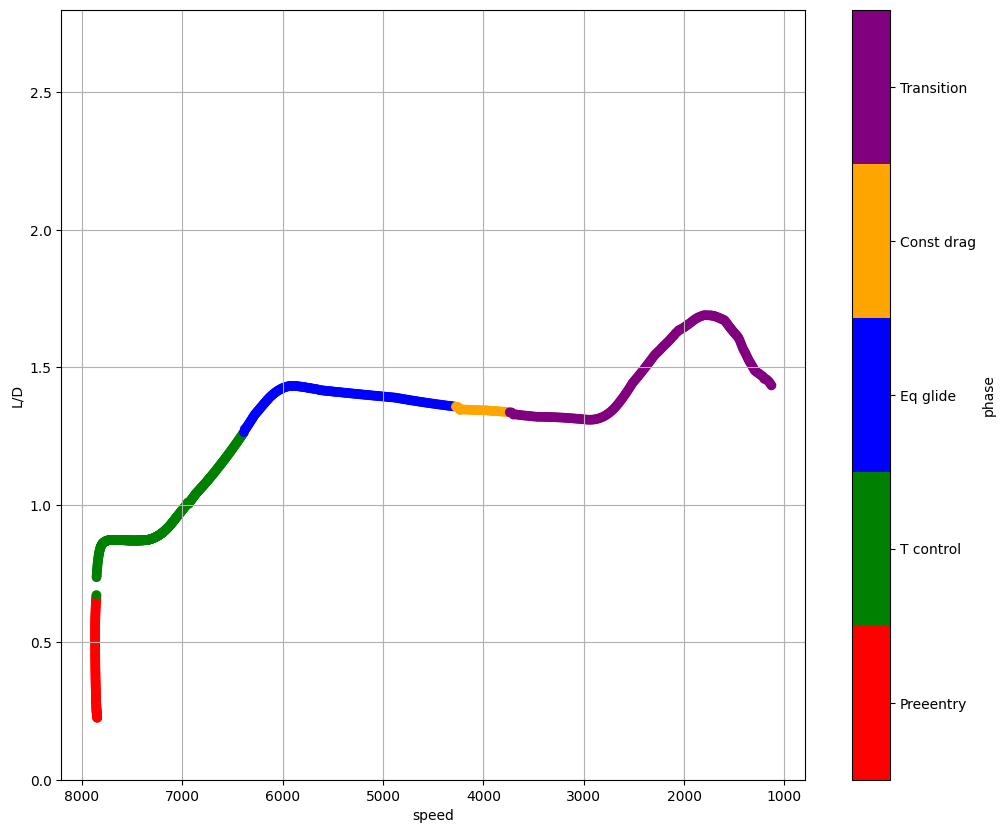

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

plt_ = ax
plt1 = plt_.scatter(data['speed'], data['l_d'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)

cbar = plt.colorbar(plt1,ticks=[1.4, 2.2, 3.0, 3.8, 4.6])
cbar.ax.set_yticklabels(['Preeentry', 'T control', 'Eq glide', 'Const drag', 'Transition'])
cbar.set_label('phase')  
    
plt_.set_xlabel('speed')
plt_.set_ylabel('L/D')
plt_.grid()

plt.ylim([0, 2.8])

plt_.invert_xaxis()


In [124]:

def traj_disp(n, data):
    if n==1:
        traj_lines = [
                    [
                        np.array([[347.68, 72.178572], [145.45, 198.178572], [78.04, 282.0], [20.26, 332.5]]),
                        np.array([[371.76, 72.178572], [174.34, 190.178572], [39.52, 332.5]]),
                        np.array([[395.83, 72.178572], [183.97, 195.178572], [58.78, 332.5]]),
                        np.array([[463.24, 72.178572], [164.71, 254.178572], [87.67, 332.5]]),
                        np.array([[443.98, 135.178572], [270.64, 205.178572], [126.19, 332.5]])
                    ],
                    [
                        np.array([[453.61, 60.178572], [429.54, 142.178572], [424.72, 156.17857]]),
                        np.array([[386.2, 65.178572], [347.68, 142.178572], [338.05, 177.178572]]),
                        np.array([[328.42, 65.178572], [270.64, 184.178572], [261.01, 226.178572]]),
                        np.array([[222.49, 135.178572], [126.19, 324], [121.37, 342]]),
                        np.array([[155.08, 184.178572], [78.04, 338]]),
                        np.array([[116.56, 228.178572], [58.78, 338]])
                    ]
                ]


        r_range = (0, 9000)
        r_speed = (5500, 7800)


    elif n==2:
        traj_lines = [
                    [
                        np.array([[232.12, 60.0], [150.34, 104.0], [68.41, 328]]),
                        np.array([[333.24, 60.0], [193.6, 328]]),
                        np.array([[376.57, 60.0], [203.23, 328]]),
                        np.array([[443.98, 60.0], [328.42, 282.17], [289.9, 328]])
                    ],
                    [
                        np.array([[304.35, 60.0], [174.34, 336]]),
                        np.array([[342.87, 60.0], [212.86, 336]]),
                        np.array([[381.39, 60.0], [280.27, 336]]),
                        np.array([[232.12, 60.0], [97.3, 336]])
                    ]

                ]

        r_range = (790, 2400)
        r_speed = (4350, 5500)

    elif n==3:

        traj_lines = [
                    [
                        np.array([[222.49, 60.178572], [39.52, 332.5]]),
                        np.array([[376.57, 60.178572], [164.71, 332.5]]),
                        np.array([[472.87, 60.178572], [357.31, 230.178572], [270.64, 332.5]])
                    ],
                    [
                        np.array([[270.64, 60.178572], [68.41, 338.178572]]),
                        np.array([[357.31, 60.178572], [145.45, 338.178572]]),
                        np.array([[415.09, 60.178572], [222.49, 338.178572]])
                    ]

                ]

        r_range = (583, 1600)
        r_speed = (3400, 4350)

    elif n==4:

        traj_lines = [
                    [
                        np.array([[338.05, 72], [164.71, 236], [39.52, 332.5]]),
                        np.array([[434.35, 72], [347.68, 170], [203.23, 292], [135.82, 332.5]]),
                        np.array([[472.87, 72], [415.09, 165], [261.01, 292], [190, 332.5]])
                    ],
                    [
                        np.array([[405.46, 60], [251.38, 198], [30, 342]]),
                        np.array([[458.5, 60], [347.68, 170], [203.23, 278], [87.67, 342]]),
                        np.array([[324, 254], [150, 342]])
                    ]
                ]

        r_range = (268, 890)
        r_speed = (1950, 3400)

    elif n==5:

        traj_lines = [
                    [
                        np.array([[338.05, 72], [183.97, 249], [58.78, 332.5]]),
                        np.array([[424.72, 72], [309.16, 191], [78.04, 332.5]]),
                        np.array([[463.24, 72], [394.40, 156], [212.86, 278], [100.93, 332.5]]),
                        np.array([[469, 72], [405.46, 156], [241.75, 278], [126.19, 332.5]])
                    ],
                    [
                        np.array([[415.09, 60], [265.83, 197], [35, 342]]),
                        np.array([[463.24, 60], [366.94, 163], [193.6, 274], [58.78, 342]])
                    ]
                ]

        r_range = (92, 333)
        r_speed = (500, 1950)
        
    traj_data = data[(data['range'].between(*r_range)) & (data['speed'].between(*r_speed))][['range', 'speed', 'drag', 'entry_phase']]

    traj_rng = traj_data['range'].to_numpy()
    traj_vel = traj_data['speed'].to_numpy()
    traj_color = traj_data['drag'].to_numpy()

    traj_x = np.array([traj_x_convert(n, r) for r in traj_rng])
    traj_y = np.array([traj_y_convert(n, v) for v in traj_vel])

    trajplot_lines(n, traj_lines, [traj_x, traj_y, traj_color])

def trajplot_lines(n, lines, data):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    #plt_.invert_yaxis()
    
    solid_lines = lines[0]
    dashed_lines = lines[1]
    
    
    img = plt.imread("traj" + str(n) + "_bg.png")
    plt_.imshow(img, aspect='auto', extent=[traj_bounds[0][0], traj_bounds[0][1], traj_bounds[1][0], traj_bounds[1][1]])
    
    #for l in solid_lines:
    #   line_X = np.array([rescale_traj_x(p, traj_bounds[0]) for p in l[:,0]])  
    #   line_y = np.array([rescale_traj_y(p, traj_bounds[1]) for p in l[:,1]]) 
    #   plt_.plot(line_X, line_y, 'r')
    #   
    #for l in dashed_lines:
    #   line_X = np.array([rescale_traj_x(p, traj_bounds[0]) for p in l[:,0]])  
    #   line_y = np.array([rescale_traj_y(p, traj_bounds[1]) for p in l[:,1]]) 
    #   plt_.plot(line_X, line_y, 'r--',  dashes=(15, 4))
       
    custom_cmap = plt.cm.get_cmap('magma', 20)
        
    plt1 = plt_.scatter(
                        np.array([rescale_traj_x(p) for p in data[0]]),
                        np.array([rescale_traj_y(p) for p in data[1]]),
        c=data[2], cmap=custom_cmap)
    
    plt_.set_xlim(traj_bounds[0])
    plt_.set_ylim(traj_bounds[1])
    
    cbar = plt.colorbar(plt1)
    plt_.grid()
    
        
def traj_x_convert(n, val):
    
    par = val * 0.539957
    
    if n==1:
        return (par**2 * -0.000037792207 + par * 0.32866883 - 218.0636)
    elif n==2:
        return (par**2 * - 0.00037578 + par * 1.2654212 -492.969942)
    elif n==3:
        return (par**2 * -0.00143805 + par * 2.5182 - 628.265)
    elif n==4:
        return (par**2 * -0.00497 + par * 4.62365 - 622.285714)
    elif n==5:

        out = (par**2 * -0.006 + par * 3.125 + 60 )
        breakpt = 105
        if (par < breakpt):
            out = out #+ 5.5 * (par - breakpt)
        return out
        
            
def traj_y_convert(n, val):
    
    par = val * 3.28084

    if n==1:
        return (-0.1187007912 * val + 966.857 + 32.7)
    elif n==2:
        return (-0.23731299972 * val + 1342.6666 + 32.7)
    elif n==3:
        return (-0.255413394 * val + 1170 + 32.7)
    elif n==4:
        return (-0.171587932 * val + 639 + 32.7)
    elif n==5:
        return (-0.2568241552 * val + 515.714 + 32.7)
    
#traj_bounds= [[0, 500], [50, 350]]
    
def rescale_traj_x(p):
    out = (p)*500/486
    return out

def rescale_traj_y(p):
    return 50 - (p - 350)
    

In [125]:
def traj_disp_new(n, data):
    if n==1:
        
        r_range = (0, 9000)
        r_speed = (5500, 7800)


    elif n==2:

        r_range = (790, 2400)
        r_speed = (4330, 5500)

    elif n==3:

        r_range = (583, 1600)
        r_speed = (3400, 4330)

    elif n==4:

        r_range = (268, 890)
        r_speed = (1950, 3400)

    elif n==5:

        traj_lines = [
                    [
                        np.array([[338.05, 72], [183.97, 249], [58.78, 332.5]]),
                        np.array([[424.72, 72], [309.16, 191], [78.04, 332.5]]),
                        np.array([[463.24, 72], [394.40, 156], [212.86, 278], [100.93, 332.5]]),
                        np.array([[469, 72], [405.46, 156], [241.75, 278], [126.19, 332.5]])
                    ],
                    [
                        np.array([[415.09, 60], [265.83, 197], [35, 342]]),
                        np.array([[463.24, 60], [366.94, 163], [193.6, 274], [58.78, 342]])
                    ]
                ]

        r_range = (92, 333)
        r_speed = (300, 1950)
        
    traj_data = data[(data['range'].between(*r_range)) & (data['speed'].between(*r_speed))][['range', 'speed', 'drag', 'entry_phase']]

    traj_vel = traj_data['speed'].to_numpy()
    traj_drag = traj_data['drag'].to_numpy()
    traj_color = traj_data['drag'].to_numpy()

    traj_x = np.array([traj_x_convert_new(n, v, d) for v, d in zip(traj_vel, traj_drag)])
    traj_y = np.array([traj_y_convert_new(n, v) for v in traj_vel])

    trajplot_lines_new(n, [traj_x, traj_y, traj_color])

def trajplot_lines_new(n, data):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    
    img = plt.imread("traj" + str(n) + "_bg.png")
    plt_.imshow(img, aspect='auto', extent=[0, 500, 50, 350])

    
    custom_cmap = plt.cm.get_cmap('viridis', 20)
        
    plt1 = plt_.scatter(
                       data[0],
                       data[1],
        c=data[2], cmap=custom_cmap, s=10)


    major_ticks = np.arange(0, 500, 25)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])
    
    cbar = plt.colorbar(plt1)
    
        
def traj_x_convert_new(n, vel, drag):
    
    if n==1:
        return 1221.8492768869419 + 0.06539042505511539 * vel**1 * drag**0 + -211.8206040700076 * vel**0 * drag**1 + -3.665448458782899e-05 * vel**2 * drag**0 + 0.023576901393660615 * vel**1 * drag**1 + 6.12823555795536 * vel**0 * drag**2 + 2.833349485587e-09 * vel**3 * drag**0 + -9.179574484665027e-07 * vel**2 * drag**1 + -0.00026682724201671166 * vel**1 * drag**2 + -0.06810957054774618 * vel**0 * drag**3
    elif n==2:
        return -38.0268152009462 + 0.09906578419425373 * vel**1 * drag**0 + -12.707084859116666 * vel**0 * drag**1 + 1.3305326295037778e-06 * vel**2 * drag**0 + 0.0011766877774739082 * vel**1 * drag**1 + -0.014838331795402771 * vel**0 * drag**2
    elif n==3:
        return -531.1596833649385 + 0.2369508010818678 * vel**1 * drag**0 + -0.7771572651359938 * vel**0 * drag**1 + -2.1586890749936138e-07 * vel**2 * drag**0 + 0.00021100580946806138 * vel**1 * drag**1 + -0.1132059499998106 * vel**0 * drag**2
    elif n==4:
        return -748.4063596835092 + 0.7408869827508833 * vel**1 * drag**0 + -13.833348494044804 * vel**0 * drag**1 + -8.626522934807035e-05 * vel**2 * drag**0 + 2.9372518671475292e-05 * vel**1 * drag**1 + 0.10761028181794845 * vel**0 * drag**2
    elif n==5:
        return -776.3651212085673 + 1.0608120994108508 * vel**1 * drag**0 + -0.0012408627622487007 * vel**0 * drag**1 + -0.000190689080882267 * vel**2 * drag**0 + -0.0018267317853930109 * vel**1 * drag**1 + -0.062043138111733405 * vel**0 * drag**2
        
            
def traj_y_convert_new(n, vel):

    if n==1:
        out = (-0.1187007912 * vel + 966.857 + 32.7)
    elif n==2:
        out = (-0.23731299972 * vel + 1342.6666 + 32.7)
    elif n==3:
        out = (-0.255413394 * vel + 1170 + 32.7)
    elif n==4:
        out = (-0.171587932 * vel + 639 + 32.7)
    elif n==5:
        out = (-0.2568241552 * vel + 565.714 + 32.7)

    return  50 - (out - 350)
    
#traj_bounds= [[0, 500], [50, 350]]

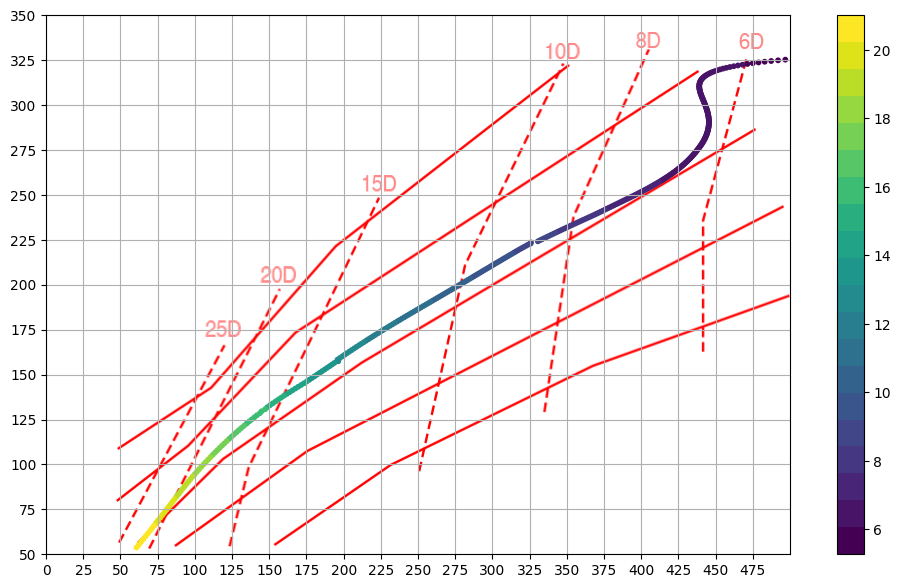

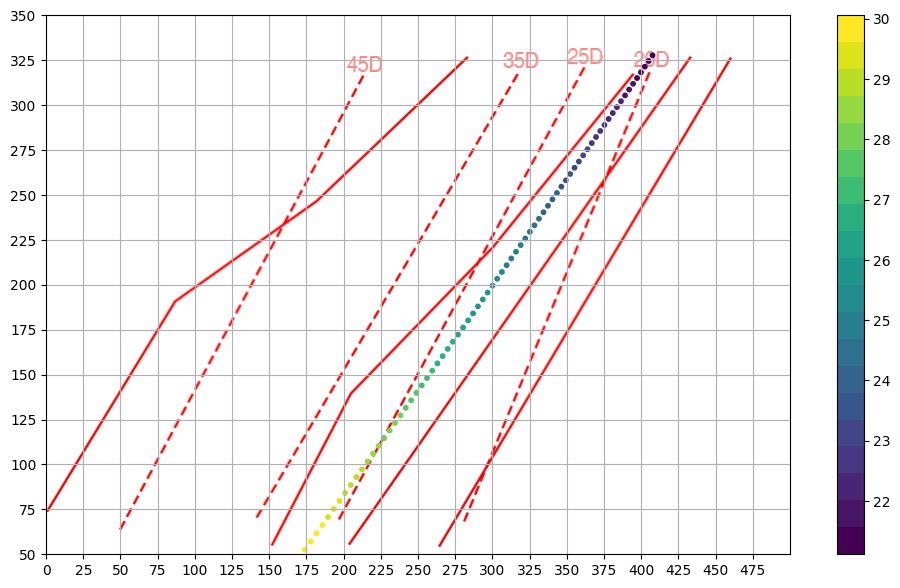

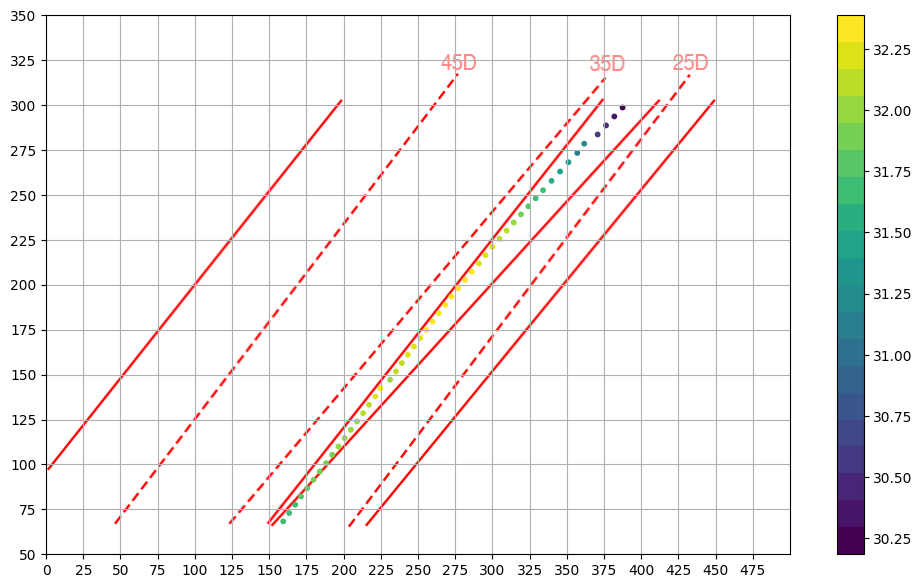

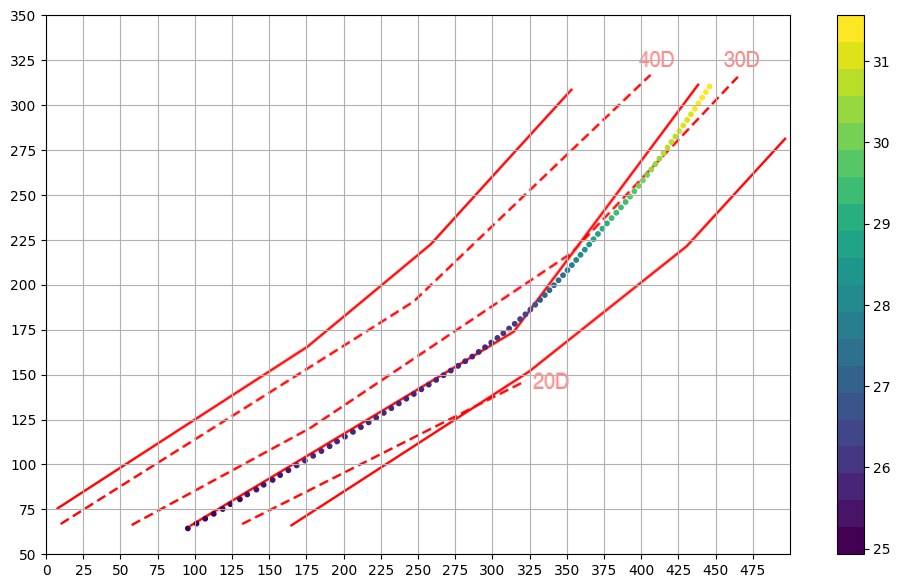

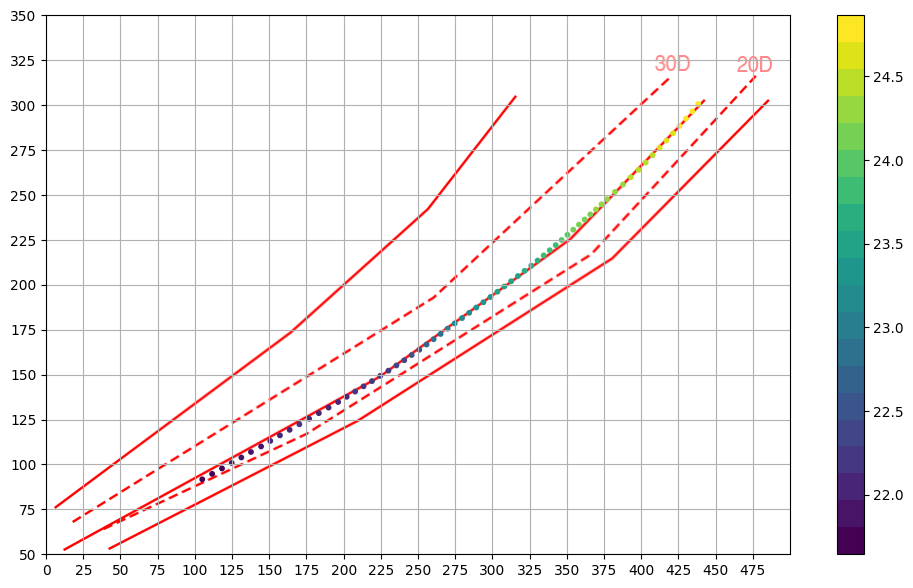

In [126]:
traj_disp_new(1, data)
traj_disp_new(2, data)
traj_disp_new(3, data)
traj_disp_new(4, data)
traj_disp_new(5, data)